<a href="https://www.lnls.cnpem.br/"><img src="https://www.lnls.cnpem.br/wp-content/uploads/2019/01/LNLS-Assinatura.svg" style="width:200px; text-align:left;"></a><i><b> </i></b>

## Magnet Inductance Step Test - II

> Magnet under test: Q14-003 - trim coil

> Power Supply: CAENels FAST-PS 1020

In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
from sympy import *
import scipy
init_printing(True)
%matplotlib inline

In [2]:
#Modifying the plot style
style.use('default')

In [3]:
# Defining Variables
E, DeltaI, DeltaT, DeltaV, L = symbols('epsilon Delta_I Delta_t Delta_V L')
Lt, V_t, R_0, I_t, t, V, tau = symbols('L(t) V(t) R_0 I(t) t V tau')
I, Ee, R, e, I_tau = symbols('I E R e I_tau')

### Definitions

In [4]:
_induct = Eq(L,-E*(DeltaT/DeltaI))
_induct_time = Eq(Lt,-1*(V_t - R_0*I_t)*(DeltaT/DeltaI))
_R0 = Eq(R_0, DeltaV/DeltaI)

#Deduction
_circuit_RL = Eq(I,(Ee/R_0)-(Ee/R_0)*e**((-R_0/L)*t))

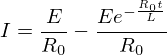

In [5]:
_circuit_RL

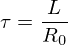

In [6]:
_time_const = Eq(tau, L/R_0)
_time_const

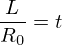

In [7]:
_time_tau = Eq(_time_const.rhs,t)
_time_tau

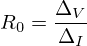

In [8]:
_R0

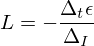

In [9]:
_induct

### Using Time Constants for RL Circuits

In [10]:
_I_tau = Eq(I_tau, (Ee/R_0)-(Ee/R_0)*e**((-R_0/L)*_time_tau.lhs))#.simplify()

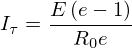

In [11]:
_I_tau_sim = simplify(_I_tau)
_I_tau_sim

In [12]:
neper = Eq(e,np.exp(1))
neper

In [13]:
_I_tau =  Eq(I_tau, (_circuit_RL.lhs)-(_circuit_RL.lhs)*neper.rhs**((-R_0/L)*_time_tau.lhs)).simplify()
_I_tau

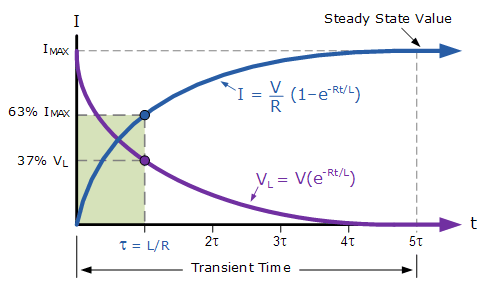

In [14]:
from IPython.display import Image
Image(filename='Magnet_Inductance_Test_image.png')

## Step ramp test 0 to 6 A

In [15]:
#Import current steps data files
_step_01 = pd.read_csv('step_01a.csv', sep=',', header=1)
_step_02 = pd.read_csv('step_02a.csv', sep=',', header=1)
_step_03 = pd.read_csv('step_03a.csv', sep=',', header=1)
_step_04 = pd.read_csv('step_04a.csv', sep=',', header=1)
_step_05 = pd.read_csv('step_05a.csv', sep=',', header=1)
_step_06 = pd.read_csv('step_06a.csv', sep=',', header=1)

In [16]:
#Creating dictionary with steps
_dict = {'step01': _step_01,
         'step02': _step_02,
         'step03': _step_03,
         'step04': _step_04,
         'step05': _step_05,
         'step06': _step_06}

In [17]:
#Manipulating data for build list of arrays
_volts_array = []
_current_array = []
_resistance_array = []
for item in _dict:
    _volts_array.append(_dict[str(item)].Volt)
    _current_array.append(_dict[str(item)].Ampere)
    _resistance_array.append(_dict[str(item)].Volt/_dict[str(item)].Ampere)

#Convert list to numpy array
_volts_array = np.asarray(_volts_array)
_current_array = np.asarray(_current_array)
_resistance_array = np.asarray(_resistance_array)

#Transposed arrays
_volts_array = _volts_array.T
_current_array = _current_array.T
_resistance_array = _resistance_array.T

In [18]:
#Creating DF for volts
_DF_for_volts = pd.DataFrame(_volts_array,
                             index=_step_01.second,
                             columns=['Step01_volts(v)', 'Step02_volts(v)', 'Step03_volts(v)',
                                      'Step04_volts(v)', 'Step05_volts(v)', 'Step06_volts(v)'])
#Creating DF for ampere
_DF_for_amp = pd.DataFrame(_current_array,
                           index=_step_01.second,
                           columns=['Step01_amp(A)', 'Step02_amp(A)', 'Step03_amp(A)',
                                    'Step04_amp(A)', 'Step05_amp(A)', 'Step06_amp(A)'])
#Creating DF for resistance
_DF_for_resis = pd.DataFrame(_resistance_array,
                             index=_step_01.second,
                             columns=['Step01_R(ohm)','Step02_R(ohm)', 'Step03_R(ohm)',
                                      'Step04_R(ohm)', 'Step05_R(ohm)', 'Step06_R(ohm)'])

In [19]:
_DF_for_volts.head()

,Step01_volts(v),Step02_volts(v),Step03_volts(v),Step04_volts(v),Step05_volts(v),Step06_volts(v)
second,,,,,,
-2.5000,-0.007027,-0.006776,-0.007228,-0.007480,-0.075086,-0.076343
-2.4975,-0.007027,-0.007027,-0.007228,-0.007228,-0.075086,-0.075086
-2.4950,-0.007279,-0.006776,-0.007228,-0.006977,-0.075086,-0.076343
-2.4925,-0.007279,-0.007279,-0.006977,-0.007228,-0.075086,-0.077599
-2.4900,-0.006792,-0.006792,-0.007480,-0.006993,-0.076343,-0.076421


In [20]:
_DF_for_amp.head()

,Step01_amp(A),Step02_amp(A),Step03_amp(A),Step04_amp(A),Step05_amp(A),Step06_amp(A)
second,,,,,,
-2.5000,-0.004986,-0.004986,-0.014808,-0.012296,-0.014808,-0.014808
-2.4975,-0.006242,-0.006242,-0.014808,-0.012296,-0.014808,-0.014808
-2.4950,-0.006242,-0.006242,-0.014808,-0.014808,-0.014808,-0.014808
-2.4925,-0.006242,-0.006242,-0.014808,-0.014808,-0.014808,-0.014808
-2.4900,-0.006242,-0.004986,-0.014808,-0.014808,-0.014808,-0.014808


In [21]:
_DF_for_resis.head()

,Step01_R(ohm),Step02_R(ohm),Step03_R(ohm),Step04_R(ohm),Step05_R(ohm),Step06_R(ohm)
second,,,,,,
-2.5000,1.409346,1.359005,0.488115,0.608328,5.070637,5.155524
-2.4975,1.125761,1.125761,0.488115,0.587833,5.070637,5.070637
-2.4950,1.166133,1.085550,0.488115,0.471164,5.070637,5.155524
-2.4925,1.166133,1.166133,0.471164,0.488115,5.070637,5.240343
-2.4900,1.088113,1.362214,0.505132,0.472245,5.155524,5.160791


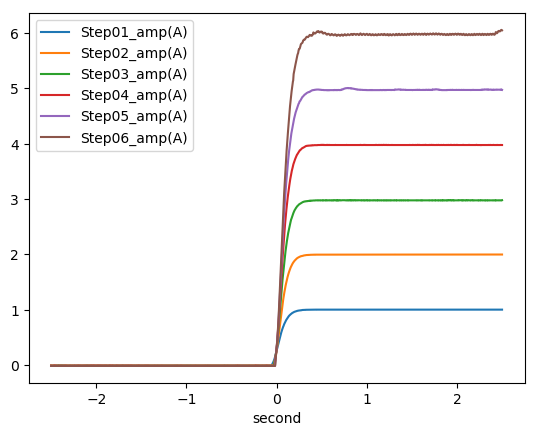

In [22]:
_DF_for_amp.plot()

In [23]:
#Time == 0
_DF_for_amp.loc[_DF_for_amp.index == -0.1]

,Step01_amp(A),Step02_amp(A),Step03_amp(A),Step04_amp(A),Step05_amp(A),Step06_amp(A)
second,,,,,,
-0.1,-0.006242,-0.004986,-0.014808,-0.012296,-0.014808,-0.014808


In [24]:
_DF_for_amp.loc[_DF_for_amp.index == 0.5]

,Step01_amp(A),Step02_amp(A),Step03_amp(A),Step04_amp(A),Step05_amp(A),Step06_amp(A)
second,,,,,,
0.5,1.002552,1.997527,2.977654,3.98001,4.972629,6.02021


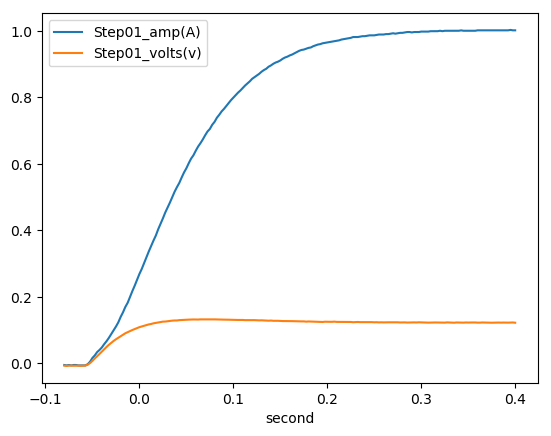

In [25]:
#Slice DF to search rise time range
#a = _DF_for_amp[-0.08:0.4175]
a = _DF_for_amp[-0.08:0.4]
v = _DF_for_volts[-0.08:0.4]
r = _DF_for_resis[-0.08:0.4]
#Plotting
cx = a.plot(y='Step01_amp(A)')
v.plot(ax=cx, y='Step01_volts(v)')
#r.plot(ax=cx, y='Step01_R(ohm)')

In [26]:
#Fitting curve for Current
_x_axis = a.index
poly = np.polyfit(_x_axis,a['Step01_amp(A)'],10)
ploy1d = np.poly1d(poly)
#print(ploy1d)

In [27]:
#Poly fit vector
poly_fit_graph = []
for i in a.index:
    num = ploy1d(i)
    poly_fit_graph.append(float(num))

Text(0.5,1,'Fit Polynomial Curve on Step 0-1A')

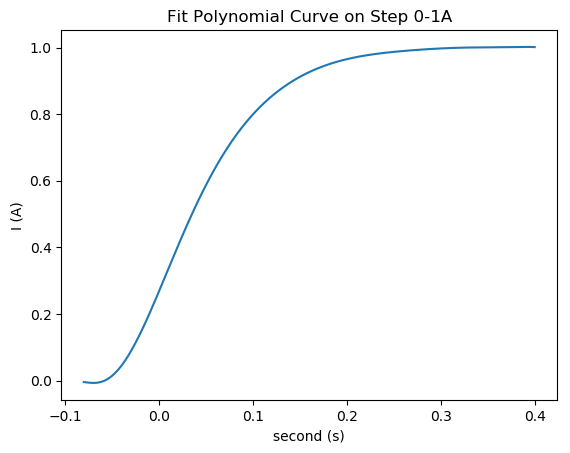

In [57]:
#Plotting polynimial curve on step 0-1A

color = 'tab:blue'
plt.plot(_x_axis,poly_fit_graph, color=color)
plt.xlabel('second (s)')
plt.ylabel('I (A)')
plt.title('Fit Polynomial Curve on Step 0-1A')

In [58]:
#Derivative curve
_deriv = ploy1d.deriv()  #dI/dt

In [59]:
#Derived curve points vector
calc = np.array([])
for i in a.index:
    calc = np.append(calc, _deriv(i))

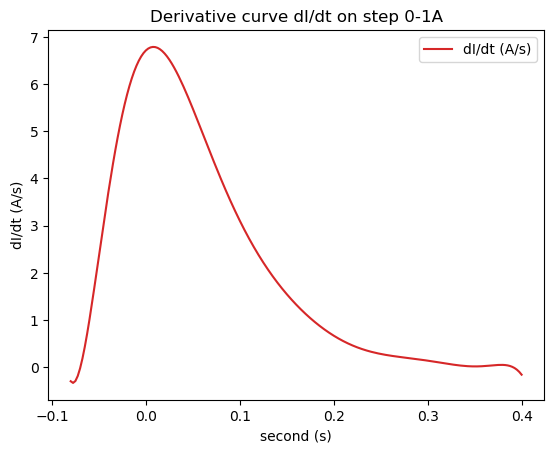

In [60]:
#Plotting dI/dt curve on step 0-1A

color = 'tab:red'
plt.plot(_x_axis, calc, color=color, label='dI/dt (A/s)')
plt.xlabel('second (s)')
plt.ylabel('dI/dt (A/s)')
plt.title('Derivative curve dI/dt on step 0-1A')
plt.legend(loc='best')

In [61]:
# #plt.plot(_x_axis, a['Step01_amp(A)'].values, 'b-', label='I(A)')
# plt.plot(_x_axis, poly_fit_graph, 'b-', label='I (A)')
# plt.plot(_x_axis, calc, 'r--', label='dI/dt (A/s)')
# plt.xlabel('second (s)')
# plt.ylabel('I (A)')
# plt.title('dI/dt(A/s) versus I(A) at Step 0-1A')
# plt.legend(loc='best')

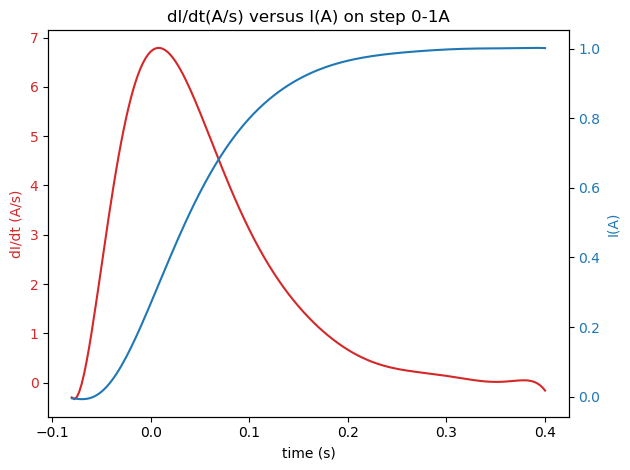

In [62]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('dI/dt (A/s)', color=color)
ax1.plot(_x_axis, calc, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('I(A)', color=color)  # we already handled the x-label with ax1
ax2.plot(_x_axis, poly_fit_graph, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('dI/dt(A/s) versus I(A) on step 0-1A')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

-------------------------------------------

In [63]:
#Calculating mean Resistance
# R_ohm = np.array([])
# for i in range (len(_DF_for_amp)):
#     R_ohm = np.append(R_ohm, _DF_for_volts['Step01_volts(v)'].iloc[i]/_DF_for_amp['Step01_amp(A)'].iloc[i])
# R_ohm.mean()

## Calculating inductance versus current for all steps [0 - 6A]

In [64]:
def poly_fit_func(df, n): #_DF_for_amp ou a
    '''Find the polynomial fit for each current step'''
    _poly_array = []
    _deriv_array = []
    _x_axis = df.index
    for item in df.columns:
        #Fitting polynomial
        poly = np.polyfit(_x_axis,df[item],n)
        ploy1d = np.poly1d(poly)
        _poly_array.append(ploy1d)
        
        #Derivative curve
        _deriv = ploy1d.deriv()  #dI/dt
        _deriv_array.append(_deriv)
    return _deriv_array
    
def final_devs(df, der_arr):
    '''List with the derivatives of the polynomial fit curves'''
    _x_axis = df.index
    f = []
    for i in der_arr:
        final = np.array([])
        for j in _x_axis:
            final = np.append(final, i(j))
        f.append(final)
    return f

In [65]:
d_arrays = poly_fit_func(a,10)

In [66]:
_derive_datas = final_devs(a,d_arrays)

In [67]:
'''Another method more simple to get derivative data'''
def derivative_form(df):
    '''Numerical method for obtaining the derivative from raw data'''
    _x_axis = df.index
    _f_array = []
    _derivative_final_list = []
    for item in df.columns:
        _f_ = np.diff(df[item])/np.diff(_x_axis)
        _f_array.append(_f_)
    
    #Replace n-1 term with zero    
    for item in _f_array:
        item = np.append(item, 0)
        _derivative_final_list.append(item)
    return _derivative_final_list

In [68]:
def df_creator(df,df_r): #(_DF_for_amp, _DF_for_resis) ou (a, r)
    _list_dfs = []
    #_deriv_list = derivative_form(df)
    for i in range(len(df.columns)):
        _dicionario = {'time(s)':df.index,
                       'I(A)':df[df.columns[i]].values,
                       #'dI/dt': _deriv_list[i],
                       'dI/dt': _derive_datas[i],
                       'R(ohm)':df_r[df_r.columns[i]].values}
        _list_dfs.append(pd.DataFrame.from_dict(_dicionario))
    return _list_dfs

In [69]:
lista_de_dfs = df_creator(a, r)

In [70]:
lista_de_dfs[0].head()

,I(A),R(ohm),dI/dt,time(s)
0,-0.005064,1.387638,-0.298475,-0.0800
1,-0.006242,1.246556,-0.334208,-0.0775
2,-0.004986,1.409346,-0.293540,-0.0750
3,-0.006242,1.088113,-0.187284,-0.0725
4,-0.004986,1.459888,-0.025326,-0.0700


In [71]:
_rd = []
_raw_deriv = []
for i in range(len(lista_de_dfs)):
    _rd.append(np.diff(lista_de_dfs[i]['I(A)']) / np.diff(_x_axis))
for item in _rd:
    item = np.append(item, 0)
    _raw_deriv.append(item)

#Forma bruta da derivada em função de x onde y = f(x)
#_f_ = np.diff(a['Step01_amp(A)']) / np.diff(_x_axis)

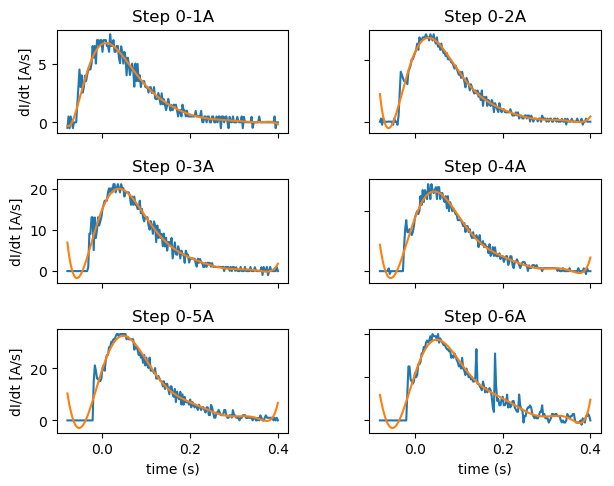

In [72]:
#Plotting raw derivative and poly fitting derivative together
fig, axs = plt.subplots(3, 2, sharex=True)
axs[0, 0].plot(_x_axis, _raw_deriv[0],'tab:blue')
axs[0, 0].plot(_x_axis, lista_de_dfs[0]['dI/dt'], 'tab:orange')
axs[0, 0].set_title('Step 0-1A')

axs[0, 1].plot(_x_axis, _raw_deriv[1],'tab:blue')
axs[0, 1].plot(_x_axis, lista_de_dfs[1]['dI/dt'], 'tab:orange')
axs[0, 1].set_title('Step 0-2A')

axs[1, 0].plot(_x_axis, _raw_deriv[2],'tab:blue')
axs[1, 0].plot(_x_axis, lista_de_dfs[2]['dI/dt'], 'tab:orange')
axs[1, 0].set_title('Step 0-3A')

axs[1, 1].plot(_x_axis, _raw_deriv[3],'tab:blue')
axs[1, 1].plot(_x_axis, lista_de_dfs[3]['dI/dt'], 'tab:orange')
axs[1, 1].set_title('Step 0-4A')

axs[2, 0].plot(_x_axis, _raw_deriv[4],'tab:blue')
axs[2, 0].plot(_x_axis, lista_de_dfs[4]['dI/dt'], 'tab:orange')
axs[2, 0].set_title('Step 0-5A')

axs[2, 1].plot(_x_axis, _raw_deriv[5],'tab:blue')
axs[2, 1].plot(_x_axis, lista_de_dfs[5]['dI/dt'], 'tab:orange')
axs[2, 1].set_title('Step 0-6A')

for ax in axs.flat:
    ax.set(xlabel='time (s)', ylabel='dI/dt [A/s]')
for ax in axs.flat:
    ax.label_outer()

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45,
                    wspace=0.35)

In [73]:
#Finding inflection point and first positives derivatives values
#Arrays used
_inflex_pts = []
_first_positives = []
_I_tau_arr = np.array([])

for i in lista_de_dfs:
    _inflex_pts.append(i.loc[i['dI/dt'].idxmax()][3])
    _box, j = 0, 0
    while i['dI/dt'][j] > _box:
        j+=1
    _box = i['dI/dt'][j]
    _first_positives.append(list(i.loc[i['dI/dt'] == _box].values)[0][3])
    
    #Fiding the maximum current for each step, and then calculating 63%:
    _I_tau_arr = np.append(_I_tau_arr,i.loc[i['I(A)'].idxmax()][0]*0.63)
    

In [74]:
_didt_pos = np.array([])
_t_arr = np.array([])
_t0_arr = np.array([])
_R_arr = np.array([])

for i in range(len(lista_de_dfs)):
#     if i == 0:
#         _box, j = 0, 0
#         while lista_de_dfs[i]['dI/dt'][j] < _box:
#             j+=1
#         _box = lista_de_dfs[i]['dI/dt'][j]
#         _didt_pos = np.append(_didt_pos,_box)
#     else:
#         _box, j = -0.1,0
#         while lista_de_dfs[i]['dI/dt'][j] > _box:

    #Fiding initial time t0 where dI/Dt are positive:
#     _t0_arr = np.append(_t0_arr,list(lista_de_dfs[i].loc[lista_de_dfs[i]['dI/dt'] == _didt_pos[i]].iloc[:1].values)[0][3])
    _t0_arr = np.append(_t0_arr,list(lista_de_dfs[i].loc[lista_de_dfs[i]['I(A)'] > 0].iloc[:1].values)[0][3])
    
    #Fiding final time t of the 63% of current:
    _t_arr = np.append(_t_arr,list(lista_de_dfs[i].loc[lista_de_dfs[i]['I(A)'] >= _I_tau_arr[i]].iloc[:1].values)[0][3])
    
    #Collect R values in the 63% of the current:
    _R_arr = np.append(_R_arr,list(lista_de_dfs[i].loc[lista_de_dfs[i]['I(A)'] >= _I_tau_arr[i]].iloc[:1].values)[0][1])

In [75]:
print(_I_tau_arr)
print(_t_arr)
print(_t0_arr)
print(_R_arr)

[0.63160776 1.25685882 1.87423992 2.50275627 3.13117308 3.76423992]
[0.06   0.08   0.085  0.0925 0.1    0.1075]
[-0.0525 -0.0325 -0.0275 -0.0225 -0.0175 -0.015 ]
[0.2059186  0.21368957 0.21861764 0.21570944 0.19063067 0.18672566]


In [76]:
_R_avg = np.array([])
for i in range(len(lista_de_dfs)):
    _R_avg = np.append(_R_avg,lista_de_dfs[i]['R(ohm)'].iloc[150:])
_R_avg.mean()

In [77]:
# Calculating Delta time (dt) for all steps
_dt = _t_arr - _t0_arr

#Finally, the Inductance for each step in Time Constant (1τ)
_L_arr = np.array([])
for i in range(len(lista_de_dfs)):
    #_L_arr = np.append(_L_arr, _dt[i]*_R_arr[i])
    _L_arr = np.append(_L_arr, _dt[i]*_R_avg.mean())
_L_arr

array([0.01397159, 0.01397159, 0.01397159, 0.01428207, 0.01459255,
       0.01521351])

In [78]:
_DF_for_resis.tail()

,Step01_R(ohm),Step02_R(ohm),Step03_R(ohm),Step04_R(ohm),Step05_R(ohm),Step06_R(ohm)
second,,,,,,
2.4875,0.122068,0.125788,0.127671,0.128240,0.115146,0.136698
2.4900,0.122059,0.125906,0.127935,0.128054,0.115204,0.125305
2.4925,0.122212,0.125985,0.127935,0.128113,0.115596,0.112033
2.4950,0.121807,0.125793,0.127671,0.128176,0.115398,0.100669
2.4975,0.122043,0.125713,0.127748,0.128180,0.115204,0.092859


In [79]:
#Avearage Inductance
_L_mean = _L_arr.mean()
_L_mean

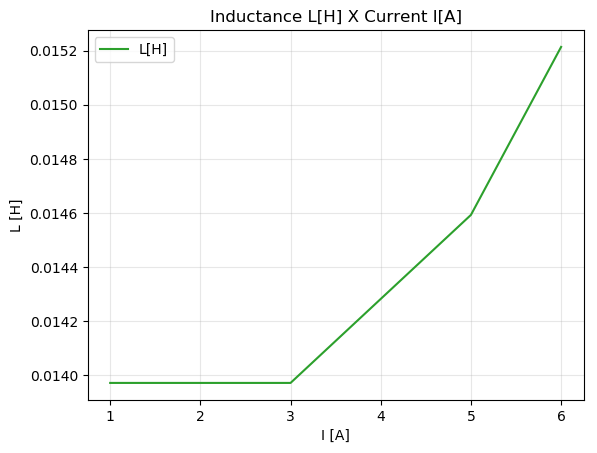

In [80]:
color = 'tab:green'
plt.plot(np.arange(1,7,1),_L_arr, color=color, label='L [H]')
plt.xlabel('I [A]')
plt.ylabel('L [H]')
plt.title('Inductance L[H] X Current I[A]')
plt.legend(loc='best')
plt.grid('on', alpha=0.3)

## Visualization data with Plotly

In [81]:
import plotly.express as px
import plotly.graph_objects as go

In [82]:
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=lista_de_dfs[0]['time(s)'], y=lista_de_dfs[0]['I(A)'], name="I [A]"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=lista_de_dfs[0]['time(s)'], y=lista_de_dfs[0]['dI/dt'], name="dI/dt [A/s]"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="<b>dI/dt(A/s) versus I(A) on Step 0-1A</b>"
)

# Set x-axis title
fig.update_xaxes(title_text="time (s)")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> I[A]", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> dI/dt [A/s]", secondary_y=True, showgrid=False)

fig.show()



In [83]:
#Muliple Y-Axes Subplots
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=2,subplot_titles=("Step 0-1A", "Step 0-2A", "Step 0-3A", "Step 0-4A", "Step 0-5A", "Step 0-6A"),
                    specs=[[{"secondary_y": True}, {"secondary_y": True}],
                           [{"secondary_y": True}, {"secondary_y": True}],
                           [{"secondary_y": True}, {"secondary_y": True}]])

# Top left
fig.add_trace(
    go.Scatter(x=lista_de_dfs[0]['time(s)'], y=lista_de_dfs[0]['I(A)'], name="0-1A I[A]"),
    row=1, col=1, secondary_y=False)

fig.add_trace(
    go.Scatter(x=lista_de_dfs[0]['time(s)'], y=lista_de_dfs[0]['dI/dt'], name="0-1A dI/dt[A/s]"),
    row=1, col=1, secondary_y=True,
)

# Top right
fig.add_trace(
    go.Scatter(x=lista_de_dfs[1]['time(s)'], y=lista_de_dfs[1]['I(A)'], name="0-2A I[A]"),
    row=1, col=2, secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=lista_de_dfs[1]['time(s)'], y=lista_de_dfs[1]['dI/dt'], name="0-2A dI/dt[A/s]"),
    row=1, col=2, secondary_y=True,
)

# Middle left
fig.add_trace(
    go.Scatter(x=lista_de_dfs[2]['time(s)'], y=lista_de_dfs[2]['I(A)'], name="0-3A I[A]"),
    row=2, col=1, secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=lista_de_dfs[2]['time(s)'], y=lista_de_dfs[2]['dI/dt'], name="0-3A dI/dt[A/s]"),
    row=2, col=1, secondary_y=True,
)


# Middle right
fig.add_trace(
    go.Scatter(x=lista_de_dfs[3]['time(s)'], y=lista_de_dfs[3]['I(A)'], name="0-4A I[A]"),
    row=2, col=2, secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=lista_de_dfs[3]['time(s)'], y=lista_de_dfs[3]['dI/dt'], name="0-4A dI/dt[A/s]"),
    row=2, col=2, secondary_y=True,
)

# Bottom left
fig.add_trace(
    go.Scatter(x=lista_de_dfs[4]['time(s)'], y=lista_de_dfs[4]['I(A)'], name="0-5A I[A]"),
    row=3, col=1, secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=lista_de_dfs[4]['time(s)'], y=lista_de_dfs[4]['dI/dt'], name="0-5A dI/dt[A/s]"),
    row=3, col=1, secondary_y=True,
)

# Bottom right
fig.add_trace(
    go.Scatter(x=lista_de_dfs[5]['time(s)'], y=lista_de_dfs[5]['I(A)'], name="0-6A I[A]"),
    row=3, col=2, secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=lista_de_dfs[5]['time(s)'], y=lista_de_dfs[5]['dI/dt'], name="0-6A dI/dt[A/s]"),
    row=3, col=2, secondary_y=True,
)

# Update xaxis properties
fig.update_xaxes(title_text="time (s)", row=1, col=1)
fig.update_xaxes(title_text="time (s)", row=1, col=2)
fig.update_xaxes(title_text="time (s)", row=2, col=1)
fig.update_xaxes(title_text="time (s)", row=2, col=2)
fig.update_xaxes(title_text="time (s)", row=3, col=1)
fig.update_xaxes(title_text="time (s)", row=3, col=2)

# secondary_y=False
# secondary_y=True, showgrid=False

# Update yaxis properties
fig.update_yaxes(title_text="I [A]",secondary_y=False, row=1, col=1)
fig.update_yaxes(title_text="dI/dt [A/s]",secondary_y=True, showgrid=False, row=1, col=1)

fig.update_yaxes(title_text="I [A]", secondary_y=False, row=1, col=2)
fig.update_yaxes(title_text="dI/dt [A/s]",secondary_y=True, showgrid=False, row=1, col=2)

fig.update_yaxes(title_text="I [A]", secondary_y=False, row=2, col=1)
fig.update_yaxes(title_text="dI/dt [A/s]",secondary_y=True, showgrid=False, row=2, col=1)

fig.update_yaxes(title_text="I [A]", secondary_y=False, row=2, col=2)
fig.update_yaxes(title_text="dI/dt [A/s]",secondary_y=True, showgrid=False, row=2, col=2)

fig.update_yaxes(title_text="I [A]", secondary_y=False, row=3, col=1)
fig.update_yaxes(title_text="dI/dt [A/s]",secondary_y=True, showgrid=False, row=3, col=1)

fig.update_yaxes(title_text="I [A]", secondary_y=False, row=3, col=2)
fig.update_yaxes(title_text="dI/dt [A/s]",secondary_y=True, showgrid=False, row=3, col=2)

# Update title and height
fig.update_layout(title_text="<b>dI/dt [A/s] versus I [A] all Steps</b>", height=800)

fig.show()

In [84]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(1,7,1), y=_L_arr,
             mode='lines',
             name='L(H)'))
# fig.update_layout(title='Inductance as a function of time',
#                   yaxis_zeroline=False, xaxis_zeroline=False)
fig.update_layout(
    title=go.layout.Title(
        text="<b>Inductance as a function of current (L[H] x I[A])</b>",
        xref="paper",
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="I[A]"
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="L(H)"
        )
    )
)

fig.show()